In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from corner import corner
from matplotlib import pyplot as plt
from stellr import Optimizer
from scipy.stats import norm

In [21]:
path = 'population+sun_results/partial_pool/DR14_ASPC/'

opt = Optimizer()
opt.load_trace(os.path.join(path, 'trace'))

In [22]:
posterior = opt.trace.posterior
posterior

<xarray.Dataset>
Dimensions:                                         (chain: 10, draw: 2000, population/stars/age_dim_0: 64, population/stars/dnu_dim_0: 64, population/stars/f_evol/__sigmoid_offset_dim_0: 64, population/stars/f_evol/offset_dim_0: 64, population/stars/f_evol_dim_0: 64, population/stars/log_age_dim_0: 64, population/stars/lum_dim_0: 64, population/stars/mass/__sigmoid_offset_dim_0: 64, population/stars/mass/offset_dim_0: 64, population/stars/mass_dim_0: 64, population/stars/mhi_dim_0: 64, population/stars/mhs_dim_0: 64, population/stars/mlt/offset_dim_0: 64, population/stars/mlt_dim_0: 64, population/stars/rad_dim_0: 64, population/stars/teff_dim_0: 64, population/stars/yi/offset_dim_0: 64, population/stars/yi_dim_0: 64, population/stars/zi/__sigmoid_offset_dim_0: 64, population/stars/zi/offset_dim_0: 64, population/stars/zi_dim_0: 64)
Coordinates:
  * draw                                            (draw) int32 0 1 ... 1999
  * population/stars/yi/offset_dim_0                (population/stars/yi/offset_dim_0) int32 0 ... 63
  * population/stars/mlt/offset_dim_0               (population/stars/mlt/offset_dim_0) int32 0 ... 63
  * population/stars/f_evol/__sigmoid_offset_dim_0  (population/stars/f_evol/__sigmoid_offset_dim_0) int32 0 ... 63
  * population/stars/mass/__sigmoid_offset_dim_0    (population/stars/mass/__sigmoid_offset_dim_0) int32 0 ... 63
  * population/stars/zi/__sigmoid_offset_dim_0      (population/stars/zi/__sigmoid_offset_dim_0) int32 0 ... 63
  * population/stars/f_evol_dim_0                   (population/stars/f_evol_dim_0) int32 0 ... 63
  * population/stars/mass_dim_0                     (population/stars/mass_dim_0) int32 0 ... 63
  * population/stars/zi_dim_0                       (population/stars/zi_dim_0) int32 0 ... 63
  * population/stars/yi_dim_0                       (population/stars/yi_dim_0) int32 0 ... 63
  * population/stars/mlt_dim_0                      (population/stars/mlt_dim_0) int32 0 ... 63
  * population/stars/log_age_dim_0                  (population/stars/log_age_dim_0) int32 0 ... 63
  * population/stars/teff_dim_0                     (population/stars/teff_dim_0) int32 0 ... 63
  * population/stars/rad_dim_0                      (population/stars/rad_dim_0) int32 0 ... 63
  * population/stars/dnu_dim_0                      (population/stars/dnu_dim_0) int32 0 ... 63
  * population/stars/mhs_dim_0                      (population/stars/mhs_dim_0) int32 0 ... 63
  * population/stars/mhi_dim_0                      (population/stars/mhi_dim_0) int32 0 ... 63
  * population/stars/age_dim_0                      (population/stars/age_dim_0) int32 0 ... 63
  * population/stars/lum_dim_0                      (population/stars/lum_dim_0) int32 0 ... 63
  * population/stars/f_evol/offset_dim_0            (population/stars/f_evol/offset_dim_0) int32 0 ... 63
  * population/stars/mass/offset_dim_0              (population/stars/mass/offset_dim_0) int32 0 ... 63
  * population/stars/zi/offset_dim_0                (population/stars/zi/offset_dim_0) int32 0 ... 63
  * chain                                           (chain) int32 0 1 2 ... 8 9
Data variables:
    population/stars/yi/offset                      (chain, draw, population/stars/yi/offset_dim_0) float32 ...
    population/stars/mlt/offset                     (chain, draw, population/stars/mlt/offset_dim_0) float32 ...
    population/stars/f_evol/__sigmoid_offset        (chain, draw, population/stars/f_evol/__sigmoid_offset_dim_0) float32 ...
    population/stars/mass/__sigmoid_offset          (chain, draw, population/stars/mass/__sigmoid_offset_dim_0) float32 ...
    population/stars/zi/__sigmoid_offset            (chain, draw, population/stars/zi/__sigmoid_offset_dim_0) float32 ...
    population/stars/f_evol                         (chain, draw, population/stars/f_evol_dim_0) float32 ...
    population/stars/mass                           (chain, draw, population/stars/mass_dim_0) float32 ...
    population/stars/zi

In [23]:
stars = pd.read_csv(os.path.join(path, 'population/stars/results.csv'))
stars.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.787223,0.870010,0.932191,1182.432590,1325.201967,1289.535691,3596.869825,0.695978,0.996358,...,18353.225517,18353.225517,13966.672871,-0.287445,-0.020236,0.000529,0.000374,-0.155726,1.000357,0.071685
1,KIC3942719,1.796417,1.837445,1.862172,1885.696329,1763.440489,1762.516388,3411.294100,1.752855,1.888088,...,4668.850338,4668.850338,7267.573509,-0.402963,-0.184656,0.000853,0.000603,-0.291168,1.001412,0.058293
2,KIC4457351,1.741225,1.796926,1.832285,1503.245478,1196.521278,1196.521278,1783.365241,1.681358,1.867983,...,21261.185858,19673.544135,13897.731433,-0.343261,-0.165847,0.000322,0.000237,-0.257974,1.000359,0.046989
3,KIC3223000,0.237187,0.364823,0.500833,1987.754912,2009.834951,2009.834951,3181.722850,0.131731,0.607467,...,11060.280968,11060.280968,12442.207612,-0.257526,-0.002148,0.000653,0.000462,-0.134466,1.000941,0.068677
4,KIC7429287,1.412570,1.509902,1.579870,1290.288463,1152.759789,1152.759789,2422.706692,1.318755,1.650847,...,14087.436520,12870.852520,11811.771543,-0.423542,-0.160516,0.000593,0.000439,-0.289075,1.000391,0.070383


In [24]:
pop = pd.read_csv(os.path.join(path, 'population/results.csv'))
pop

,dydz_16th,dydz_50th,dydz_84th,dydz_ess_bulk,dydz_ess_mean,dydz_ess_sd,dydz_ess_tail,dydz_hpd_3%,dydz_hpd_97%,dydz_mcse_mean,...,sigma_mlt_ess_mean,sigma_mlt_ess_sd,sigma_mlt_ess_tail,sigma_mlt_hpd_3%,sigma_mlt_hpd_97%,sigma_mlt_mcse_mean,sigma_mlt_mcse_sd,sigma_mlt_mean,sigma_mlt_r_hat,sigma_mlt_sd
0,0.79672,1.049008,1.326393,1000.421792,958.166606,935.412058,1666.761209,0.533749,1.621609,0.009209,...,703.185234,703.185234,1332.81708,0.036031,0.244246,0.002095,0.001482,0.137825,1.010904,0.055562


In [28]:
var_names = ['/'.join(['population', name]) for name in ['dydz', 'yp', 'sigma_yi', 'mu_mlt', 'sigma_mlt']]
# var_names = ['/'.join(['population', name]) for name in ['dydz', 'yp', 'sigma_yi', 'mlt']]

In [29]:
samples = posterior[var_names].to_dataframe()

In [30]:
n = 100

subsamples = samples.sample(n)

z = np.array([[0.], [0.05]]) * np.ones((2, n))
y = z * subsamples['population/dydz'].to_numpy()[np.newaxis, :] + \
    subsamples['population/yp'].to_numpy()[np.newaxis, :]

In [31]:
y_upper = y + subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]
y_lower = y - subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]

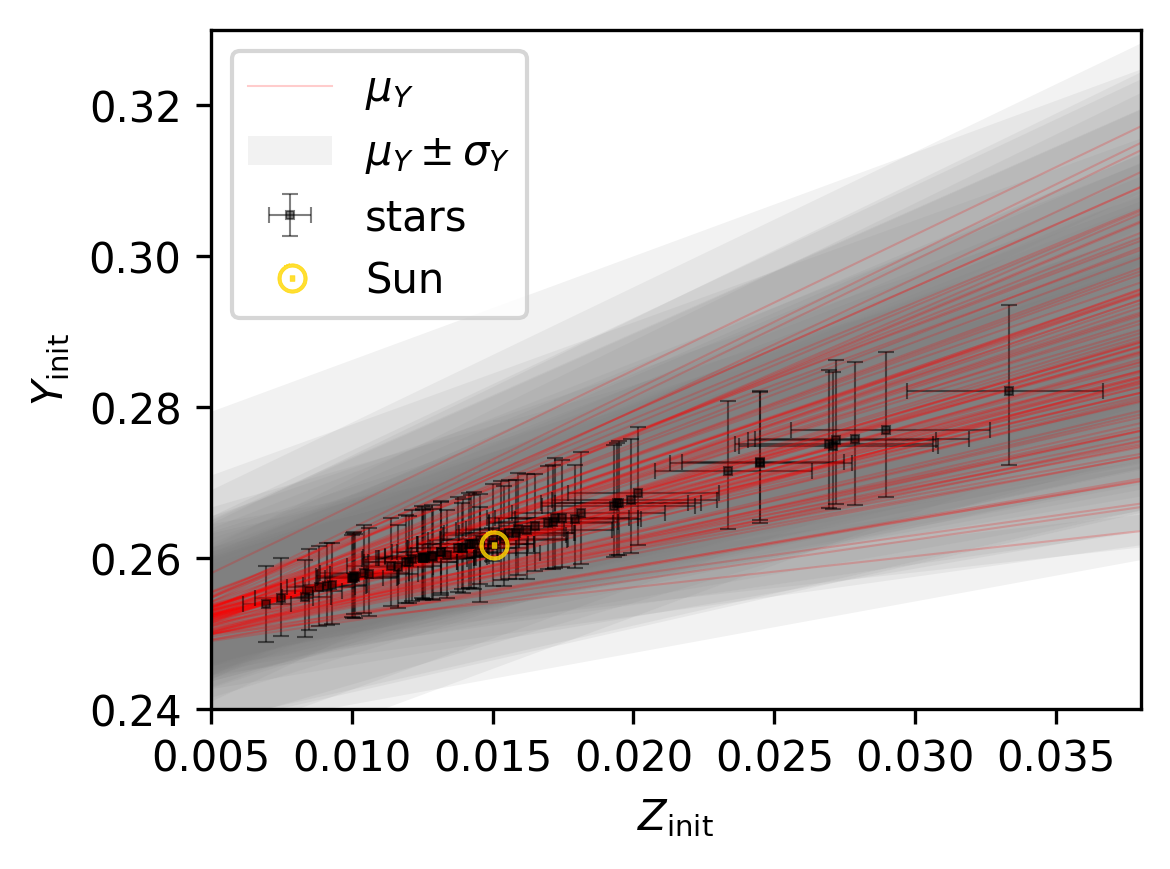

In [32]:
plt.figure(figsize=(4, 3), dpi=300)

for i in range(n):
    l_sig = plt.fill_between(z[:, i], y_upper[:, i], y_lower[:, i], facecolor='grey', edgecolor='none', alpha=0.1)

l_mod = plt.plot(z, y, 'r', alpha=0.2, linewidth=0.5)

l_data = plt.errorbar(x=stars['zi_50th'], y=stars['yi_50th'],
             xerr=[stars['zi_50th']-stars['zi_16th'], stars['zi_84th']-stars['zi_50th']], 
             yerr=[stars['yi_50th']-stars['yi_16th'], stars['yi_84th']-stars['yi_50th']],
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, markeredgewidth=0.5,
#              zorder=1
             )

handles = [l_mod[0], l_sig, l_data]
labels=[r'$\mu_Y$', r'$\mu_Y \pm \sigma_Y$', 'stars']

if 'SUN' in stars['name'].to_numpy():
    s = stars[stars['name']=='SUN']
    l_sun, = plt.plot(s['zi_50th'], s['yi_50th'], c='gold', marker=r'$\odot$', markersize=8,
                 linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
             )
    handles += [l_sun]
    labels += ['Sun']

plt.xlabel(r'$Z_\mathrm{init}$')
plt.ylabel(r'$Y_\mathrm{init}$')

plt.xlim(0.005, 0.038)
plt.ylim(0.24, 0.33)

# plt.legend();

plt.legend(handles=handles, labels=labels);

plt.savefig(os.path.join(path, 'zi_yi_results_plot.png'), bbox_inches='tight')

In [40]:
zz = np.array([[0.], [0.05]]) * np.ones((2, 20000))
yy = samples['population/dydz'].to_numpy()[np.newaxis, :] * zz + samples['population/yp'].to_numpy()[np.newaxis, :]

array([[0.2482228 , 0.24760836, 0.24781469, ..., 0.24650361, 0.24678031,
        0.24707295],
       [0.2780229 , 0.27987619, 0.28412083, ..., 0.27705254, 0.27204635,
        0.26782014]])

In [47]:
yy_med = np.median(yy, axis=1)

In [64]:
yy_84 = np.quantile(yy, .84, axis=1)

In [65]:
yy_16 = np.quantile(yy, .16, axis=1)

In [66]:
yy_up = yy + samples['population/sigma_yi'].to_numpy()[np.newaxis, :]
yy_low = yy - samples['population/sigma_yi'].to_numpy()[np.newaxis, :]

In [68]:
yy_up_med = np.median(yy_up, axis=1)
yy_up_84 = np.quantile(yy_up, .84, axis=1)
yy_up_16 = np.quantile(yy_up, .16, axis=1)

In [69]:
yy_low_med = np.median(yy_low, axis=1)
yy_low_84 = np.quantile(yy_low, .84, axis=1)
yy_low_16 = np.quantile(yy_low, .16, axis=1)

In [85]:
np = pd.read_csv('stars_results/DR14_ASPC/stars/results.csv')
print(len(np))
np.head()

65


,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.763321,0.915235,1.046385,814.365176,807.303557,801.092467,2283.722583,0.665883,1.148091,...,16114.286060,16114.286060,12091.605099,-0.286714,-0.014441,0.000571,0.000404,-0.151989,1.000285,0.072446
1,KIC3942719,1.793372,1.842284,1.875486,1208.655610,1313.961699,1300.915979,4350.549601,1.745100,1.902267,...,4721.370081,4610.206042,5994.090706,-0.399115,-0.182095,0.000851,0.000609,-0.286317,1.001281,0.058497
2,KIC4457351,1.730574,1.791438,1.841019,1282.096402,1346.560937,1332.039675,3487.793276,1.684641,1.875507,...,18653.945354,16806.701632,12661.388740,-0.346223,-0.166987,0.000347,0.000258,-0.255532,1.000415,0.047389
3,KIC3223000,0.241799,0.427376,0.608999,1018.251812,1026.676044,1026.676044,1525.716817,0.117327,0.721454,...,11134.823647,11134.823647,12483.149321,-0.261360,-0.000487,0.000666,0.000471,-0.128199,1.000233,0.070297
4,KIC7429287,1.392368,1.515212,1.632316,920.639688,941.100703,926.034823,2818.445597,1.318749,1.697221,...,13411.201816,12436.152423,11806.379119,-0.416528,-0.157931,0.000604,0.000443,-0.284552,1.000286,0.069892


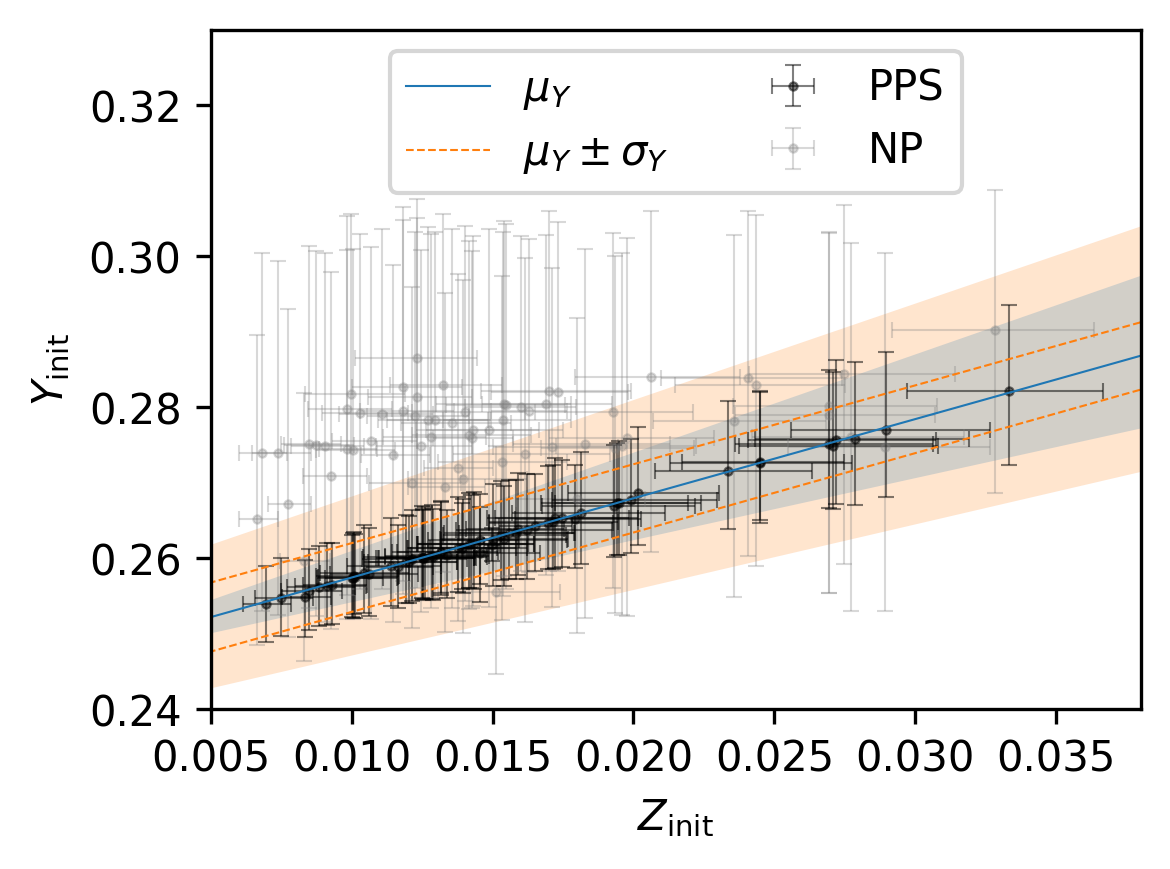

In [107]:
plt.figure(figsize=(4, 3), dpi=300)

# for i in range(n):
#     l_sig = plt.fill_between(z[:, i], y_upper[:, i], y_lower[:, i], facecolor='grey', edgecolor='none', alpha=0.1)

l_up, = plt.plot(zz[:, 0], yy_up_med, 'C1--', linewidth=0.5)
l_low, = plt.plot(zz[:, 0], yy_low_med, 'C1--', linewidth=0.5)

l_spread = plt.fill_between(zz[:, 0], yy_up_84, yy_low_16, facecolor='C1', alpha=0.2, linewidth=0.5)

# l_mod = plt.plot(z, y, 'r', alpha=0.2, linewidth=0.5)
l_med, = plt.plot(zz[:, 0], yy_med, linewidth=0.5)
l_cred = plt.fill_between(zz[:, 0], yy_84, yy_16, alpha=0.2, linewidth=0.5, 
                          facecolor='C0', edgecolor='none', )

l_np = plt.errorbar(x=np['zi_50th'], y=np['yi_50th'],
             xerr=[np['zi_50th']-np['zi_16th'], np['zi_84th']-np['zi_50th']], 
             yerr=[np['yi_50th']-np['yi_16th'], np['yi_84th']-np['yi_50th']],
             linestyle='none', alpha=0.3, color='grey',
             marker='o', markersize=2, elinewidth=0.5,
             capsize=2, markeredgewidth=0.5,
             zorder=1
             )

l_data = plt.errorbar(x=stars['zi_50th'], y=stars['yi_50th'],
             xerr=[stars['zi_50th']-stars['zi_16th'], stars['zi_84th']-stars['zi_50th']], 
             yerr=[stars['yi_50th']-stars['yi_16th'], stars['yi_84th']-stars['yi_50th']],
             linestyle='none', alpha=0.5, color='k',
             marker='o', markersize=2, elinewidth=0.5,
             capsize=2, markeredgewidth=0.5,
             zorder=1
             )

handles = [l_med, 
#            l_cred, 
           l_up, 
#            l_spread, 
           l_data, l_np]
labels=[r'$\mu_Y$', 
#         r'$\mu_Y$ 68', 
        r'$\mu_Y \pm \sigma_Y$', 
#         r'$\mu_Y \pm \sigma_Y$ 68', 
        'PPS', 'NP']

# if 'SUN' in stars['name'].to_numpy():
#     s = stars[stars['name']=='SUN']
#     l_sun, = plt.plot(s['zi_50th'], s['yi_50th'], c='gold', marker=r'$\odot$', markersize=8,
#                  linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
#              )
#     handles += [l_sun]
#     labels += ['Sun']

plt.xlabel(r'$Z_\mathrm{init}$')
plt.ylabel(r'$Y_\mathrm{init}$')

plt.xlim(0.005, 0.038)
plt.ylim(0.24, 0.33)

# plt.legend();

plt.legend(handles=handles, labels=labels, ncol=2, loc='upper center');
plt.savefig(os.path.join(path, 'zi_yi_results_plot_2.png'), bbox_inches='tight')

In [171]:
n_points = 100
z = np.linspace(0.005, 0.04, n_points)[:, np.newaxis] * np.ones((n_points, n))
y = z * subsamples['population/dydz'].to_numpy()[np.newaxis, :] + \
    subsamples['population/yp'].to_numpy()[np.newaxis, :]
zx = z / (1 - y - z)
zx_sun = 0.0181
mhi = np.log10(zx) - np.log10(zx_sun)

In [172]:
y_upper = y + subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]
y_lower = y - subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]

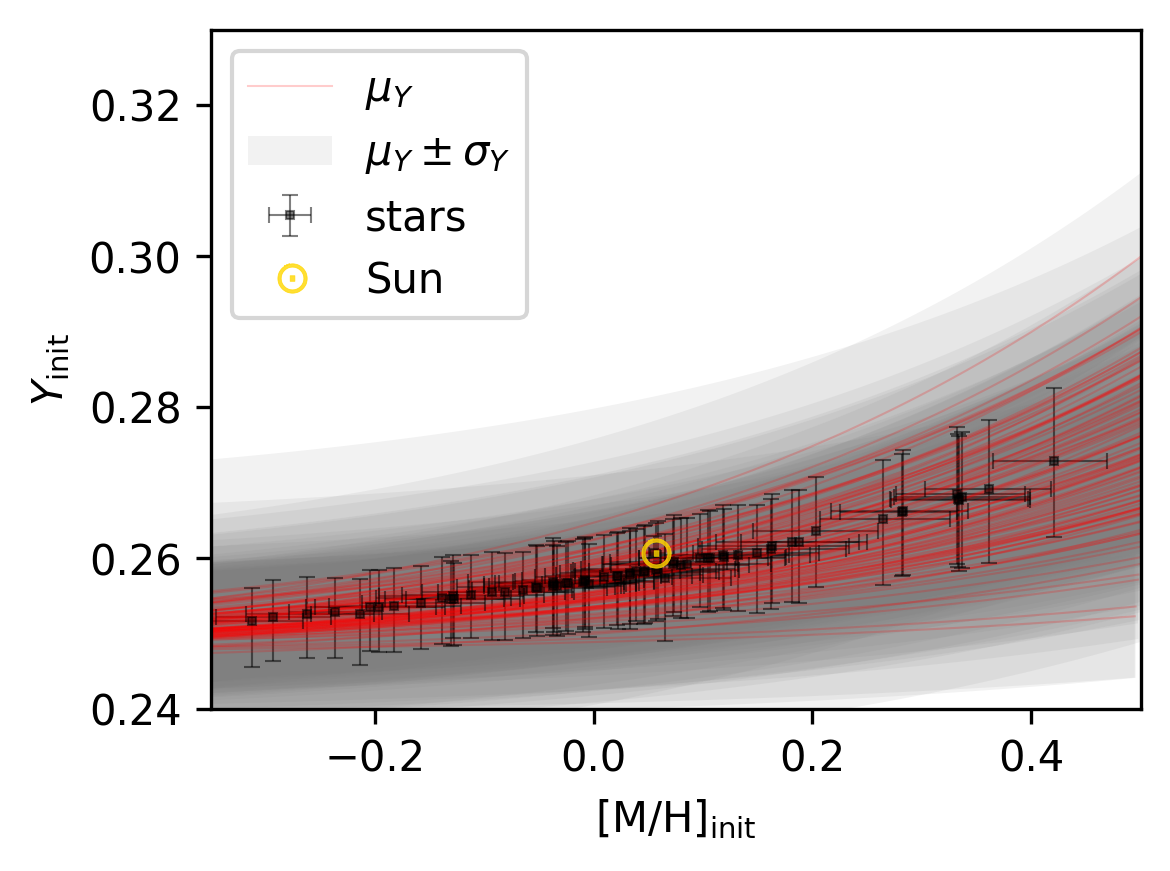

In [173]:
plt.figure(figsize=(4, 3), dpi=300)

for i in range(n):
    l_sig = plt.fill_between(mhi[:, i], y_upper[:, i], y_lower[:, i], facecolor='grey', edgecolor='none', alpha=0.1)

l_mod = plt.plot(mhi, y, 'r', alpha=0.2, linewidth=0.5)

l_data = plt.errorbar(x=stars['mhi_50th'], y=stars['yi_50th'],
             xerr=[stars['mhi_50th']-stars['mhi_16th'], stars['mhi_84th']-stars['mhi_50th']], 
             yerr=[stars['yi_50th']-stars['yi_16th'], stars['yi_84th']-stars['yi_50th']],
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, markeredgewidth=0.5,
#              zorder=1
             )

handles = [l_mod[0], l_sig, l_data]
labels=[r'$\mu_Y$', r'$\mu_Y \pm \sigma_Y$', 'stars']

if 'SUN' in stars['name'].to_numpy():
    s = stars[stars['name']=='SUN']
    l_sun, = plt.plot(s['mhi_50th'], s['yi_50th'], c='gold', marker=r'$\odot$', markersize=8,
                 linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
             )
    handles += [l_sun]
    labels += ['Sun']
    
plt.xlabel(r'$[\mathrm{M}/\mathrm{H}]_\mathrm{init}$')
plt.ylabel(r'$Y_\mathrm{init}$')

plt.xlim(-0.35, 0.5)
plt.ylim(0.24, 0.33)

# plt.legend();
# plt.legend(handles=[l_mod[0], l_data], labels=[r'$Y_\mathrm{model}(Z)$', 'stars']);
plt.legend(handles=handles, labels=labels);

plt.savefig(os.path.join(path, 'mhi_yi_results_plot.png'), bbox_inches='tight')

In [161]:
sstars = stars.sort_values('mlt_50th').reset_index(drop=True)
sstars.head()

KeyError: 'mlt_50th'

In [143]:
mu_mlt = subsamples['population/mu_mlt'].to_numpy()
sigma_mlt = subsamples['population/sigma_mlt'].to_numpy()

In [144]:
mlt = np.linspace(1.2, 2.8, 500)
cdf = norm.cdf(mlt[:, np.newaxis], mu_mlt, sigma_mlt) * len(sstars)

In [145]:
mlt_upper = mu_mlt + sigma_mlt
mlt_lower = mu_mlt - sigma_mlt

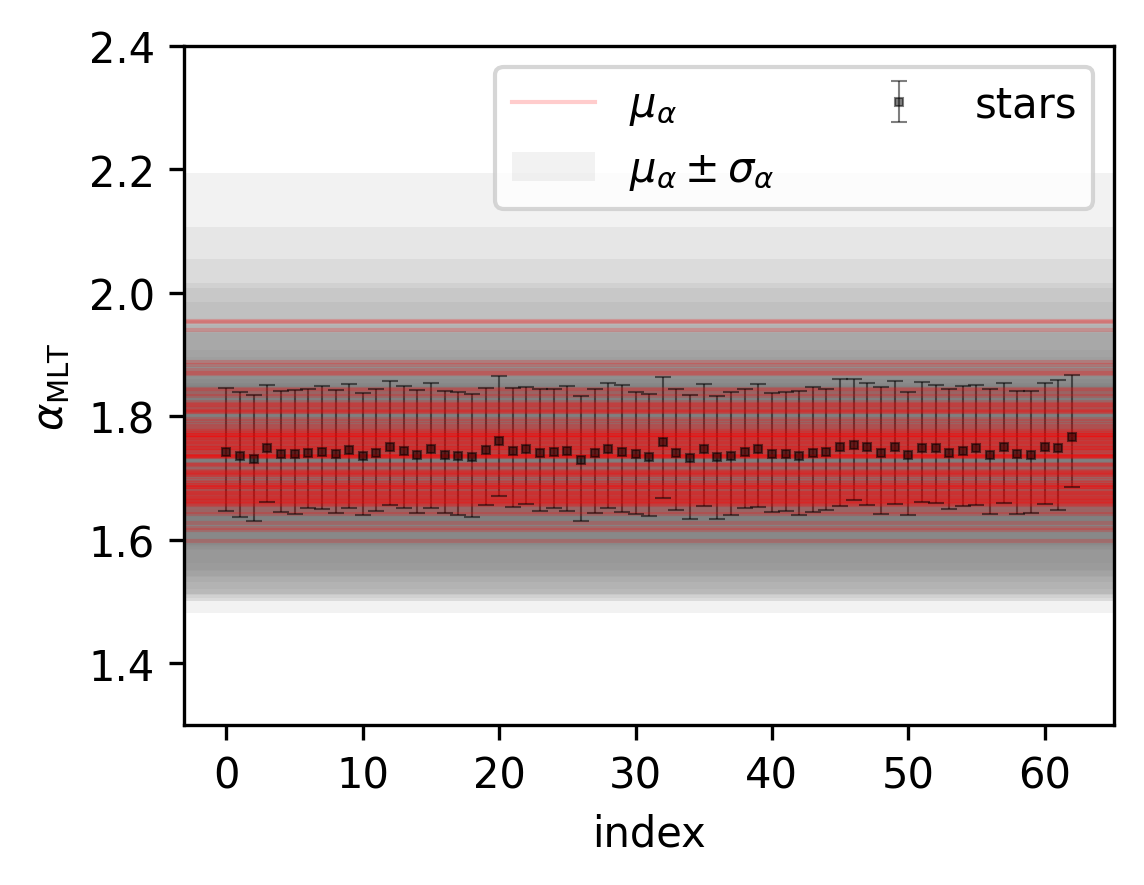

In [146]:
plt.figure(figsize=(4, 3), dpi=300)

for i in range(n):
    l_sig = plt.axhspan(mlt_upper[i], mlt_lower[i], facecolor='grey', edgecolor='none', alpha=0.1)

# plt.axhline()
for mmlt in mu_mlt:
    l0 = plt.axhline(mmlt, color='r', linewidth=1, alpha=0.2)

l1 = plt.errorbar(stars.index, stars['mlt_50th'], 
                 yerr=[stars['mlt_50th']-stars['mlt_16th'], stars['mlt_84th']-stars['mlt_50th']], 
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, label='stars', markeredgewidth=0.5,)

# l_mp = plt.axhline(2.09, color='b', linestyle='--')
# text = plt.text(0, 2.12, r'MPS $\alpha_\mathrm{mlt} = 2.09 \pm 0.03$', color='b')

handles = [l0, l_sig, l1]
labels = [r'$\mu_\alpha$', r'$\mu_\alpha \pm \sigma_\alpha$', 'stars']

if 'SUN' in stars['name'].to_numpy():
    s = stars[stars['name']=='SUN']
    l_sun, = plt.plot(s.index, s['mlt_50th'], c='gold', marker=r'$\odot$', markersize=8,
                 linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
             )
    handles += [l_sun]
    labels += ['Sun']

plt.xlabel('index')
plt.ylabel(r'$\alpha_\mathrm{MLT}$')
plt.ylim(1.3, 2.4)
# plt.xticks(rotation=90, fontsize=4);
plt.legend(handles=handles, labels=labels, ncol=2, 
#            title='PPS',
#            loc='lower left'
          );
# plt.xlim(
#     sstars['mlt_50th'].median()-10*np.median(sigma_mlt),
#     sstars['mlt_50th'].median()+10*np.median(sigma_mlt)
# )
plt.savefig(os.path.join(path, 'mlt_results_plot.png'), bbox_inches='tight')

In [80]:
# # ax = stars.plot(kind='hist', y='mlt_50%', histtype='step', density=True)
# plt.figure(figsize=(4, 3), dpi=300)
# l0 = plt.plot(mlt, cdf, 'r', linewidth=1, alpha=0.2,  label='')
# l1 = plt.errorbar(sstars['mlt_50th'], sstars.index, 
#                  xerr=[sstars['mlt_50th']-sstars['mlt_16th'], sstars['mlt_84th']-sstars['mlt_50th']], 
#              linestyle='none', alpha=0.5, color='k',
#              marker='s', markersize=2, elinewidth=0.5,
#              capsize=2, label='stars', markeredgewidth=0.5,)

# plt.xlabel(r'$\alpha_\mathrm{MLT}$')
# plt.ylabel('star')
# plt.xlim(
#     sstars['mlt_50th'].median()-10*np.median(sigma_mlt),
#     sstars['mlt_50th'].median()+10*np.median(sigma_mlt)
# )
# plt.legend()
# plt.savefig(os.path.join(path, 'mlt_results_plot.png'), bbox_inches='tight')

In [81]:
pdf = norm.pdf(mlt[:, np.newaxis], mu_mlt, sigma_mlt)

(1.2460650354623795, 2.222519502043724)

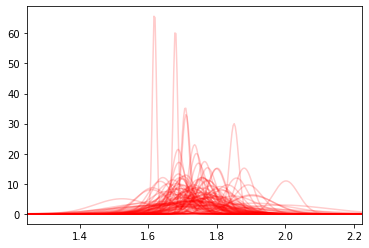

In [82]:
# plt.hist(sstars['mlt_50th'], density=True)
plt.plot(mlt, pdf, 'r', alpha=0.2);
plt.xlim(
    np.median(mu_mlt)-10*np.median(sigma_mlt),
    np.median(mu_mlt)+10*np.median(sigma_mlt)
)

In [83]:
yi_samples = posterior['population/stars/yi'].to_dataframe()
zi_samples = posterior['population/stars/zi'].to_dataframe()

In [84]:
xs = np.append(zi_samples.to_numpy(), yi_samples.to_numpy(), axis=1)
xs

array([[0.01186959, 0.25775802],
       [0.00575434, 0.25019366],
       [0.0086943 , 0.2527663 ],
       ...,
       [0.01356887, 0.24957278],
       [0.01275153, 0.2572497 ],
       [0.01460234, 0.25807077]], dtype=float32)

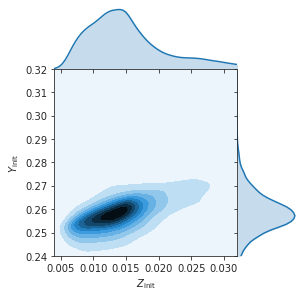

In [142]:
mask = np.random.choice(np.arange(xs.shape[0]), size=20000, replace=False)

with sns.axes_style('ticks'):
    gs = sns.jointplot(xs[mask, 0], xs[mask, 1], kind='kde',
                       height=4, ratio=3, space=0.0)
    ax = gs.ax_joint
    ax.set_xlim(0.004, 0.032)
    ax.set_ylim(0.24, 0.32)
    ax.set_xlabel(r'$Z_\mathrm{init}$')
    ax.set_ylabel(r'$Y_\mathrm{init}$')

plt.savefig(os.path.join(path, 'zi_yi_joint_plot.png'), dpi=300, bbox_inches='tight')

In [157]:
xs = samples.to_numpy()

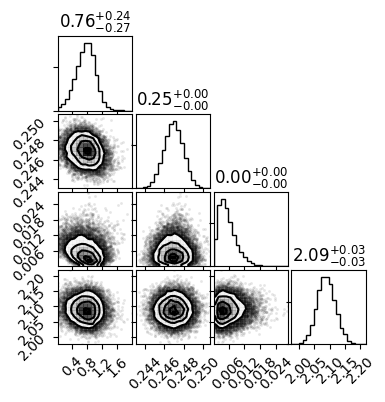

In [163]:
fig, axes = plt.subplots(len(params), len(params), figsize=(3.6, 3.6))
corner(xs, show_titles=True, fig=fig);